Importing libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading two files, `train.csv` and `test.csv`. And combining them together where `'Survived'` column is gone.

In [2]:
#load data
train_data = pd.read_csv('~/Desktop/Kaggle/projects/Titanic_Machine_Learning/train.csv')
test_data = pd.read_csv('~/Desktop/Kaggle/projects/Titanic_Machine_Learning/test.csv')


#print names of columns
print('test_data columns:',test_data.columns.to_list())
print('train_data columns:',train_data.columns.to_list())


#concantinate data together w/o 'Survived' column
data = pd.concat([train_data.drop(columns=['Survived']),test_data]).reset_index().drop(columns=['index'])
data.head()

test_data columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
train_data columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#changed 'Sex' column output from 'male' and 'female' to 0 and 1
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## Analyzing data

Look through each columns to understand the data.

### `Pclass`

`'Pclass'` is the ticket class for passenger. This column has no null entries, so we do not have to clean this column.

In [4]:
#check if there missing data in 'pclass' column
pclass_missing = train_data.Pclass.isna().sum()
print("Missing data in 'Pclass' column:", pclass_missing)

Missing data in 'Pclass' column: 0


POPULATION %: It looks like that the majority people are third class (55.11%), and the first and second classes have similar number of people (24.24% and 20.65%).

   pclass  percent
0       1    24.24
1       2    20.65
2       3    55.11
AxesSubplot(0.125,0.125;0.775x0.755)


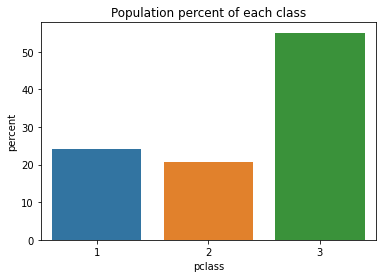

In [5]:
#TABLES
#population percent of each 'Pclass'
pclass_percent = ((train_data.Pclass.value_counts().sort_index()/len(train_data))*100).round(2)

#convert to dataframe
percent_table = pd.DataFrame({'pclass':pclass_percent.index, 'percent':pclass_percent.values})
print(percent_table)


#GRAPH
#title the graph
plt.title('Population percent of each class')

#graph the table above
percent_graph=sns.barplot(x='pclass', y='percent', data=percent_table)
print(percent_graph)

SURVIVAL RATE: The most people survived in 1st class (62.96 %). The least people survived in 3rd class (24.24 %).

   pclass  percent
0       1    62.96
1       2    47.28
2       3    24.24


Text(0.5, 1.0, 'Survival Rate in Each Class')

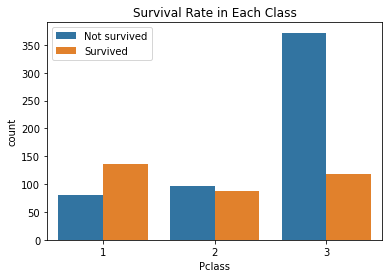

In [6]:
#TABLE
#survival rate in each class
survival_rate = ((train_data.groupby('Pclass').Survived.mean())*100).round(2)

#conver to DataFrame
survival_rate_table=pd.DataFrame({'pclass':survival_rate.index, 'percent':survival_rate.values})
print(survival_rate_table)


#GRAPH
survival_rate_graph = sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.legend(['Not survived', 'Survived'])
plt.title('Survival Rate in Each Class')

CORRELATION: Survival and class have weak negative correlation of 0.3385.

In [7]:
pclass_correlation = (train_data['Pclass'].corr(train_data['Survived'])).round(4)
print(pclass_correlation)

-0.3385


CONCLUSION:
Eventhough the most population of passengers are 3rd class, the first and second class have better survival rate. Therefore, we must include this column because it has weak correlation between `'Pclass'` and `'Survived'`.

### `Sex`

`'Sex'` is the gender of each passenger. Where 'male'= 0 and 'female' = 1. Also this column does not have Null entries.

In [8]:
#number of missing values in 'Sex' column
sex_missing = train_data.Sex.isna().sum()
print("Missing data in 'Sex' column:", sex_missing)

Missing data in 'Sex' column: 0


POPULATION %: Majority of passengers are males (64.76%).


   sex  percent
0    0    64.76
1    1    35.24
AxesSubplot(0.125,0.125;0.775x0.755)


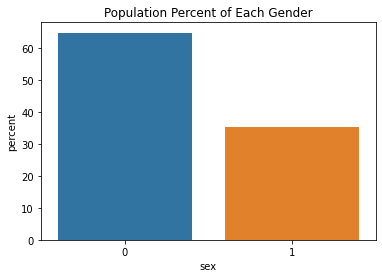

In [9]:
#TABLE
sex_percent = ((train_data.Sex.value_counts()/len(train_data))*100).round(2)

sex_table = pd.DataFrame({'sex': sex_percent.index, 'percent': sex_percent.values})
print(sex_table)


#GRAPH
plt.title('Population Percent of Each Gender')

percent_sex_graph=sns.barplot(x='sex', y='percent', data=sex_table)
print(percent_sex_graph)

SURVIVAL RATE: More females (74.20 %) survided than males (18.89 %) survived.

   sex  percent
0    0    18.89
1    1    74.20


Text(0.5, 1.0, 'Survival Rate in Each Gender')

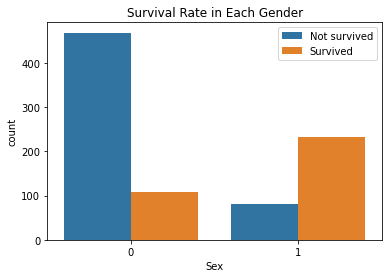

In [10]:
#TABLE
sex_survival_rate = ((train_data.groupby('Sex').Survived.mean())*100).round(2)

sex_survival_rate_table = pd.DataFrame({'sex':sex_survival_rate.index, 'percent':sex_survival_rate.values})
print(sex_survival_rate_table)


#GRAPH
sex_survival_rate_graph = sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.legend(['Not survived', 'Survived'])
plt.title('Survival Rate in Each Gender')

CORRELATION: There exist moderate positive correlation of 0.5434 between `'Sex'` and `'Survived'` columns.

In [11]:
pclass_correlation = (train_data['Sex'].corr(train_data['Survived'])).round(4)
print('Correlation between "Sex" and "Survived":', pclass_correlation)

Correlation between "Sex" and "Survived": 0.5434


CONCLUSION: Eventhough there was more 'males' then 'females' on the ship, 'females' have better survival rate than males. Keep this column because it has positive moderate correlation betweem `'Sex'` and `'Survived'`.

### `Age`

`'Age'` is the age of each passenger.


MISSING DATA: There is 177 rows that have missing entry for `'Age'` column. This means that 19.87% of `'Age'` column data is missing, which is alot. Thus, we need to replace the missing data, so that model would predict better outcome.

In [12]:
#number of entries that have null in 'Age' column.
age_missing = train_data.Age.isna().sum()
print('Missing data in "Age" column:', age_missing)

#calculate percent of missing data
age_missing_percent = ((age_missing/ len(train_data))*100).round(2)
print('Percent of missing data:', age_missing_percent)

Missing data in "Age" column: 177
Percent of missing data: 19.87


DISTRIBUTION WITH OTHER FACTORS: On average the majority of passengers are between 20 and 35 years old. Average age for female is 27.9, and for males is 30.7. The average age of 1st class is 38.2, second class is 29.9, and 3rd class is 25.1.

Text(0.5, 1.0, 'Distribution of Ages')

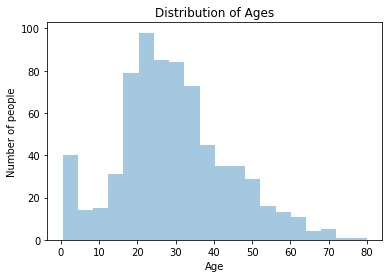

In [13]:
#GRAPH
#average age of passengers
sns.distplot(a=train_data['Age'], kde=False)
plt.ylabel('Number of people')
plt.title('Distribution of Ages')

   sex    age
0    0  30.73
1    1  27.92


Text(0.5, 1.0, 'Age Distribution Based on Sex')

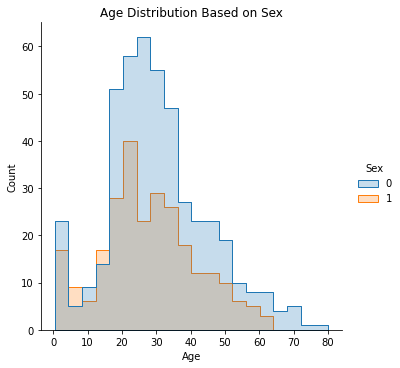

In [14]:
#DATA
#average age by 'Sex'
average_age_sex = (train_data.groupby('Sex').Age.mean()).round(2)
average_age_sex_table = pd.DataFrame({'sex':average_age_sex.index, 'age':average_age_sex.values})
print(average_age_sex_table)

#GRAPH
sns.displot(train_data, x='Age', hue='Sex', element='step')
plt.title('Age Distribution Based on Sex')

   pclass    age
0       1  38.23
1       2  29.88
2       3  25.14


Text(0.5, 1.0, 'Age Distribution Based on Pclass')

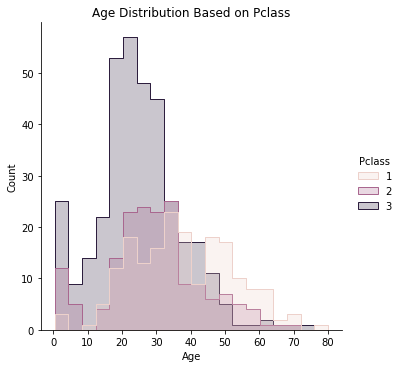

In [15]:
#DATA
#average age by 'Pclass'
average_age_pclass = (train_data.groupby('Pclass').Age.mean()).round(2)
average_age_pclass_table = pd.DataFrame({'pclass':average_age_pclass.index, 'age':average_age_pclass.values})
print(average_age_pclass_table)

#GRAPH
sns.displot(train_data, x='Age', hue='Pclass', element='step')
plt.title('Age Distribution Based on Pclass')

SURVIVAL RATE AND SURVIVAL DISTRIBUTION: By looking at the graphs, the survival rate varies among all ages. The youngest people have higher chance to survive.

    age  percent
0  0.42   100.00
1  0.67   100.00
2  0.75   100.00
3  0.83   100.00
4  0.92   100.00
5  1.00    71.43
6  2.00    30.00
7  3.00    83.33
8  4.00    70.00
9  5.00   100.00


Text(0.5, 1.0, 'Survival Rate Based on Age')

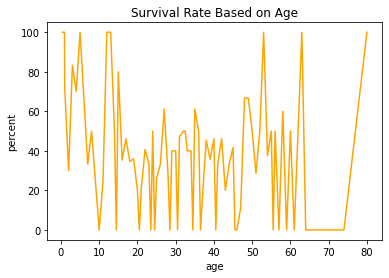

In [16]:
#TABLE
#survival rate of each age
age_survival_rate = ((train_data.groupby('Age').Survived.mean())*100).round(2)
age_survival_rate_table = pd.DataFrame({'age':age_survival_rate.index, 'percent':age_survival_rate.values})
print(age_survival_rate_table.head(10))


#GRAPH
sns.lineplot(data=age_survival_rate_table, x='age', y='percent', color='orange')
plt.title("Survival Rate Based on Age")

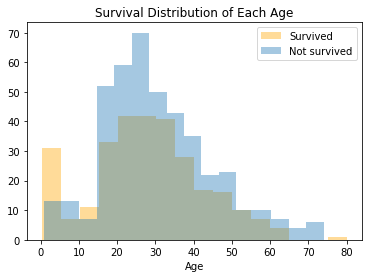

In [17]:
#GRAPH
#survaval distribution of each age
survived = (train_data.Survived == 1)
not_survived = (train_data.Survived == 0)

sns.distplot(a=train_data[survived].Age, color='orange', kde=False)
sns.distplot(a=train_data[not_survived].Age, kde=False)
plt.title('Survival Distribution of Each Age')
plt.legend(['Survived', 'Not survived'])

CORRELATION: The correlation is -0.0772, which is almost 0. Thus, there is almost no correlation between `'Age'` and `'Survived'` columns.

In [18]:
age_correlation = (train_data['Age'].corr(train_data['Survived'])).round(4)
print('Correlation between "Age" and "Survived":', age_correlation)

Correlation between "Age" and "Survived": -0.0772


CONCLUSION: Alot of `'Age'` data is missing, so it is need to be fixed. The overal correlation between `'Age'` and `'Survived'` is very small, such that young people have better chance to survive.

### `SibSp`

`'SibSp'` is the number of siblings and spouses the the passenget travelling with.

MISSING DATA: There is no missing data in this column.

In [19]:
#check if there missing data in 'SibSp' column
sibsp_missing = train_data.SibSp.isna().sum()
print("Missing data in 'SibSp' column:", sibsp_missing)

Missing data in 'SibSp' column: 0


COUNT: Looking at number of people survived or not based on number of `'SibSp'` for each person.

In [20]:
#TABLE

#pulled total # of survived passemgers based on 'SibSp' column
a = train_data.loc[train_data.Survived == 1]
a = a.groupby('SibSp').Survived.sum()
print(a)
print()


#pulled total # of 'Survived' == 0 based on 'SibSp' column
b = train_data.loc[train_data.Survived == 0]
b = b.groupby('SibSp').Survived.count()
print(b)

SibSp
0    210
1    112
2     13
3      4
4      3
Name: Survived, dtype: int64

SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: Survived, dtype: int64


In [21]:
#create one DataFrame using Series 'a' and 'b'
c = pd.concat([a, b], axis=1).reset_index().fillna(0)

#change third column from 'Survived' to 'Not Survived'
c.columns.values[2]='Not Survived'

#add 'Total' column
c['Total'] = c['Survived'] + c['Not Survived']

#view datatype of each column
print(c.dtypes)
print()

#change 'Survived' and 'Total' columns datatype to integer
c.Survived = c.Survived.astype('int64')
c.Total = c.Total.astype('int64')
print(c.dtypes)
print()

#final data frame
print(c)

SibSp             int64
Survived        float64
Not Survived      int64
Total           float64
dtype: object

SibSp           int64
Survived        int64
Not Survived    int64
Total           int64
dtype: object

   SibSp  Survived  Not Survived  Total
0      0       210           398    608
1      1       112            97    209
2      2        13            15     28
3      3         4            12     16
4      4         3            15     18
5      5         0             5      5
6      8         0             7      7


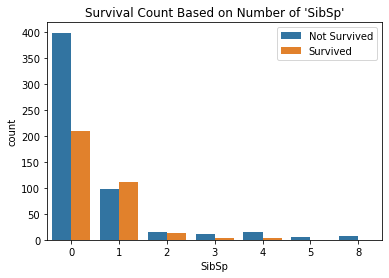

In [22]:
#GRAPH
sns.countplot(x='SibSp', hue='Survived', data=train_data)
plt.title("Survival Count Based on Number of 'SibSp'")
plt.legend(['Not Survived', 'Survived'], loc='upper right')

SURVIVAL RATE: The pick of survival rate is 53.59% when `'SibSp'` value is 1. After the pick it is drastically decreases.

   SibSp  Percent
0      0    34.54
1      1    53.59
2      2    46.43
3      3    25.00
4      4    16.67
5      5     0.00
6      8     0.00


Text(0.5, 1.0, "Survival Rate Based on 'SibSp'")

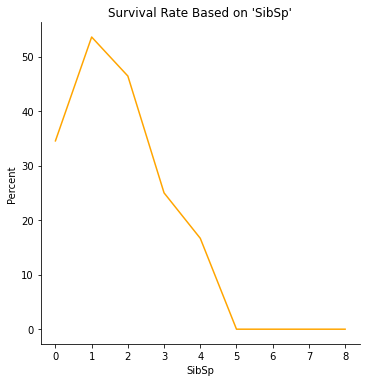

In [23]:
#TABLE
sibsp_survival_rate = ((train_data.groupby('SibSp').Survived.mean())*100).round(2)

sibsp_survival_rate_table = pd.DataFrame({'SibSp':sibsp_survival_rate.index, 'Percent':sibsp_survival_rate.values})
print(sibsp_survival_rate_table)


#GRAPH
sns.relplot(x="SibSp", y="Percent", kind="line", color='orange', data=sibsp_survival_rate_table)
plt.title("Survival Rate Based on 'SibSp'")


CORRELATION: It has weak correlation almost no correlation.

In [24]:
sibsp_correlation = (train_data['SibSp'].corr(train_data['Survived'])).round(4)
print('Correlation between "SibSp" and "Survived":', sibsp_correlation)

Correlation between "SibSp" and "Survived": -0.0353


SUMMARY: The most number of people died that had `'SibSp'` is 0, which also is the majority of population on the ship. In the survival rate, the graph has shape of parabola with pick at `'SibSp'`=2. By looking at the whole data, there is almost no linear correlation between `'Survived'` and `'SibSp'`.

### `Parch`

`'Parch'` is the number of parents and children that the passenger travelling with.

MISSING DATA: There is no missing data in this column.

In [25]:
#check if there missing data in 'Parch' column
parch_missing = train_data.Parch.isna().sum()
print("Missing data in 'Parch' column:", parch_missing)

Missing data in 'Parch' column: 0


COUNT: Looking at number of people survived or not based on number of `'Parch'` for each person.

In [26]:
#TABLE

#pulled total # of survived passemgers based on 'SibSp' column
a1 = train_data.loc[train_data.Survived == 1]
a1 = a1.groupby('Parch').Survived.sum()
print(a1)
print()


#pulled total # of NOT survived passengers based on 'SibSp' column
b1 = train_data.loc[train_data.Survived == 0]
b1 = b1.groupby('Parch').Survived.count()
print(b1)

Parch
0    233
1     65
2     40
3      3
5      1
Name: Survived, dtype: int64

Parch
0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: Survived, dtype: int64


In [27]:
#create one DataFrame using Series 'a' and 'b'
c1 = pd.concat([a1, b1], axis=1).reset_index().fillna(0)

#change third column from 'Survived' to 'Not Survived'
c1.columns.values[2]='Not Survived'

#add 'Total' column
c1['Total'] = c1['Survived'] + c1['Not Survived']

#add 'Percent' column
c1['PopPercent'] = ((c1.Total/len(train_data))*100).round(2)

#view datatype of each column
print(c1.dtypes)
print()

#change 'Survived' and 'Total' columns datatype to integer
c1.Survived = c1.Survived.astype('int64')
c1.Total = c1.Total.astype('int64')
print(c1.dtypes)
print()

#final data frame
print(c1)

Parch             int64
Survived        float64
Not Survived      int64
Total           float64
PopPercent      float64
dtype: object

Parch             int64
Survived          int64
Not Survived      int64
Total             int64
PopPercent      float64
dtype: object

   Parch  Survived  Not Survived  Total  PopPercent
0      0       233           445    678       76.09
1      1        65            53    118       13.24
2      2        40            40     80        8.98
3      3         3             2      5        0.56
4      4         0             4      4        0.45
5      5         1             4      5        0.56
6      6         0             1      1        0.11


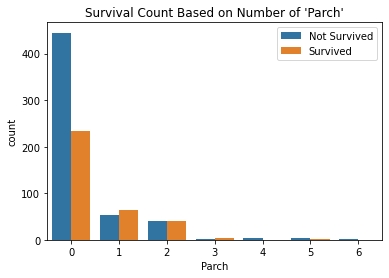

In [28]:
#GRAPH
sns.countplot(x='Parch', hue='Survived', data=train_data)
plt.title("Survival Count Based on Number of 'Parch'")
plt.legend(['Not Survived', 'Survived'], loc='upper right')

SURVIVAL RATE: Max survival rate is 60% when `'Parch'` value is 3. However, there is multiple picks.

   Parch  Percent
0      0    34.37
1      1    55.08
2      2    50.00
3      3    60.00
4      4     0.00
5      5    20.00
6      6     0.00


Text(0.5, 1.0, "Survival Rate Based on 'Parch'")

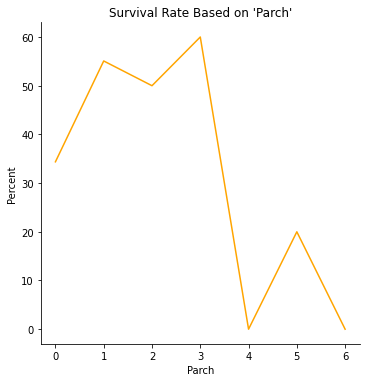

In [29]:
#TABLE
parch_survival_rate = ((train_data.groupby('Parch').Survived.mean())*100).round(2)

parch_survival_rate_table = pd.DataFrame({'Parch':parch_survival_rate.index, 'Percent':parch_survival_rate.values})
print(parch_survival_rate_table)


#GRAPH
sns.relplot(x="Parch", y="Percent", kind="line", color='orange', data=parch_survival_rate_table)
plt.title("Survival Rate Based on 'Parch'")

CORRELATION: It has weak correlation almost no correlation.

In [30]:
parch_correlation = (train_data['Parch'].corr(train_data['Survived'])).round(4)
print('Correlation between "Parch" and "Survived":', parch_correlation)

Correlation between "Parch" and "Survived": 0.0816


SUMMARY: The 76.09% of population has `'Parch'`=0. The highest survival rate is among `'Parch'`=1, 2, 3. There is aloso very weak correlation between `'Survived'` and `'Parch'`.

#### - Family size and Party size? (not sue if need to include)

### `Embarked`

`'Embarked'` is the departure location for each passenger. Where 'C'=Cherbourg, 'Q'=Queenstown, 'S'=Southampton.

MISSING DATA: There are 2 missing values in this column. Need to replace it with actual values/letters.

In [31]:
#check if there missing data in 'Parch' column
embarked_missing = train_data.Embarked.isna().sum()
print("Missing data in 'Embarked' column:", embarked_missing)

Missing data in 'Embarked' column: 2


POPULATION PERCENT: Most of population is in S (72.28%). 

  embarked  percent
0        S    72.28
1        C    18.86
2        Q     8.64
AxesSubplot(0.125,0.125;0.775x0.755)


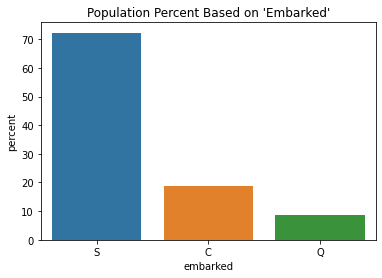

In [32]:
#TABLE
embarked_percent = ((train_data.Embarked.value_counts()/len(train_data))*100).round(2)

embarked_percent_table = pd.DataFrame({'embarked': embarked_percent.index, 'percent': embarked_percent.values})
print(embarked_percent_table)


#GRAPH
plt.title("Population Percent Based on 'Embarked'")

percent_embarked_graph=sns.barplot(x='embarked', y='percent', data=embarked_percent_table)
print(percent_embarked_graph)

SURVIVAL RATE: It varies by each 'Embarked'.

  Embarked  Percent
0        C    55.36
1        Q    38.96
2        S    33.70


Text(0.5, 1.0, 'Survival Rate for Each Embarked')

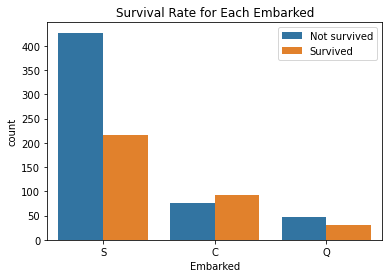

In [33]:
#TABLE
embarked_survival_rate = ((train_data.groupby('Embarked').Survived.mean())*100).round(2)

embarked_survival_rate_table = pd.DataFrame({'Embarked':embarked_survival_rate.index, 'Percent':embarked_survival_rate.values})
print(embarked_survival_rate_table)


#GRAPH
embarked_survival_rate_graph = sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.legend(['Not survived', 'Survived'])
plt.title('Survival Rate for Each Embarked')

RELATION TO 'Class' COLUMN: 'S' and 'Q' have the most of 'Pclass' = 3. And 'C' have the most of 'Pclass' = 1.


In [34]:
#number of passengers based on 'Embarked' and 'Pclass'
x1 = train_data.groupby('Embarked').Pclass.value_counts().sort_index()

#total number of passengers in each 'Embarked'
y1 = train_data.Embarked.value_counts()

#percentage in each 'Embarkrd' based on 'Pclass'
s_percent = ((x1['S']/y1['S'])*100)
q_percent = ((x1['Q']/y1['Q'])*100)
c_percent = ((x1['C']/y1['C'])*100)

#convert to DataFrame
z1=pd.concat([s_percent,q_percent,c_percent], axis=1)
z1.columns.values[0]='S'
z1.columns.values[1]='Q'
z1.columns.values[2]='C'
print(z1)

                S          Q          C
Pclass                                 
1       19.720497   2.597403  50.595238
2       25.465839   3.896104  10.119048
3       54.813665  93.506494  39.285714


Text(0, 0.5, 'Percent')

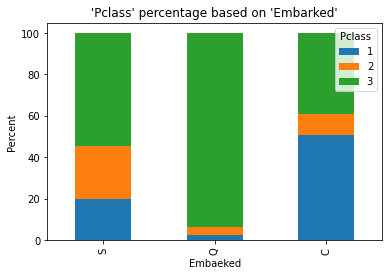

In [35]:
#GRAPH
#change rows with columns
z = z1.T
#graph it
z[[1,2,3]].plot(kind='bar',stacked=True)
plt.title("'Pclass' percentage based on 'Embarked'")
plt.xlabel('Embaeked')
plt.ylabel('Percent')

RELATION TO 'Sex' COLUMN: There is more men for each 'Embarked'.


              Women        Men
Embarked                      
C         43.452381  56.547619
Q         46.753247  53.246753
S         31.521739  68.478261


Text(0, 0.5, 'Percent')

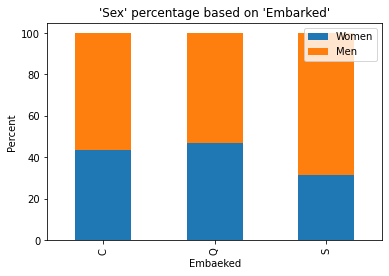

In [36]:
#TABLE
#percentage of woman based on embarked
w = (train_data.groupby(['Embarked']).Sex.mean())*100
#convert to DataFrame
w = pd.DataFrame(w)
#change name of the first column to 'Women'
w.columns.values[0] = 'Women'
#add new column 'Men'
w['Men'] = 100 - w['Women']
print(w)


#GRAPH
w[['Women','Men']].plot(kind='bar',stacked=True)
plt.title("'Sex' percentage based on 'Embarked'")
plt.xlabel('Embaeked')
plt.ylabel('Percent')

SUMMARY: 'C' has the highest percentage of survival because most of the passengers are 'Pclass'=1. 'S' and 'Q' consist with mainly 'Pclass' = 3, and survival rate is pretty low might due to male population.

### `Fare`

`'Fare'` is the fee that passenger paid for ticket.

MISSING DATA: There is no missing data in this column.

In [37]:
fare_missing = train_data.Fare.isna().sum()
print("Missing data in 'Fare' column:", fare_missing)

Missing data in 'Fare' column: 0


AVERAGE: The higest average is in 1st class. On average female paid more than males.

   Pclass    Average
0       1  84.154687
1       2  20.662183
2       3  13.675550


Text(0.5, 1.0, "Average 'Fare' based on 'Pclass'")

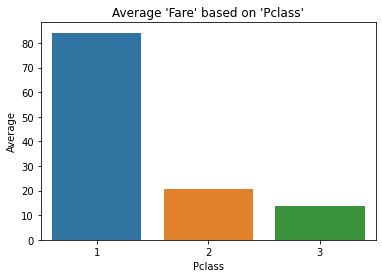

In [38]:
#'Fare' average based on 'Pclass'
mean_pclass_fare = train_data.groupby('Pclass').Fare.mean()

mean_pclass_fare_table = pd.DataFrame({'Pclass':mean_pclass_fare.index, 'Average':mean_pclass_fare.values})
print(mean_pclass_fare_table)

#GRAPH
sns.barplot(x='Pclass', y='Average', data=mean_pclass_fare_table)
plt.title("Average 'Fare' based on 'Pclass'")

                  Fare
Pclass Sex            
1      0     67.226127
       1    106.125798
2      0     19.741782
       1     21.970121
3      0     12.661633
       1     16.118810


Text(0.5, 1.0, "Average 'Fare' based on 'Pclass' and 'Sex'")

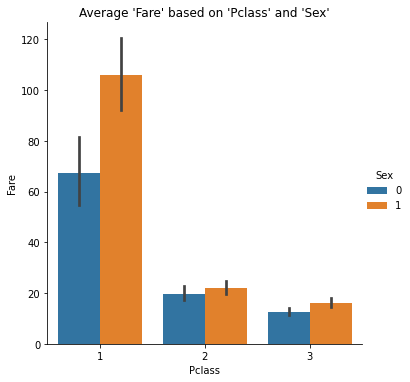

In [39]:
#Average 'Fare' based on 'Pclass' and 'Sex'
g=train_data.groupby(['Pclass','Sex']).Fare.mean()
g=pd.DataFrame(g)
print(g)

#GRAPH
sns.catplot(x = "Pclass", y = "Fare", hue = "Sex", data = train_data, kind = "bar")
plt.title("Average 'Fare' based on 'Pclass' and 'Sex'")

CORRELATION: Slightly possitive correlation between `'Fare'` and `'Survived'`.

In [40]:
fare_correlation = (train_data['Fare'].corr(train_data['Survived'])).round(4)
print('Correlation between "Parch" and "Survived":', fare_correlation)

Correlation between "Parch" and "Survived": 0.2573


CLASS-WISE CORRELATIONS OF THE `'Fare'` AND `'Survived'`: The highest correlation is in 1st class.

In [41]:
#All class_wise correlations of Fare with Survived
all_corr_fare = pd.DataFrame(train_data.groupby(['Pclass'])[['Fare','Survived']].corr())
all_corr_fare

Fare  Survived
Pclass                             
1      Fare      1.000000  0.190966
       Survived  0.190966  1.000000
2      Fare      1.000000  0.098628
       Survived  0.098628  1.000000
3      Fare      1.000000  0.000930
       Survived  0.000930  1.000000

In [42]:
print('First:',all_corr_fare.loc[1].iloc[0,1])
print('Second:',all_corr_fare.loc[2].iloc[0,1])
print('Third:',all_corr_fare.loc[3].iloc[0,1])

First: 0.19096640841564308
Second: 0.09862818081146572
Third: 0.0009295304523811009


SUMMARY: Combine two genders together, the 1st class paid more for `'Fare'`. On average female paind more than male for their ticket in every class. The correlation between `'Fare'` and `'Survived'` is relatively low (0.2573). And correlation between `'Fare'` and `'Survived'` in each `'Pclass'` is low too, the highest one in first class (0.1909).

### `Name`

`'Name'` is the name of each passenger.

MISSING DATA: There is no missing data in this column.

In [43]:
name_missing = train_data.Name.isna().sum()
print("Missing data in 'Name' column:", name_missing)

Missing data in 'Name' column: 0


CHANGE DATA: Change DataFrame by separating 'Name' column into 'FamilyName' and 'Title'

In [44]:
#creates 'FamilyName' column
data['FamilyName'] = data['Name'].apply(lambda x : x.split(', ')[0])
#creates 'Title' column
data['Title'] = data['Name'].apply(lambda x : x.split(', ')[1].split('. ')[0])
#drops 'Name' column
data = data.drop(columns=['Name'])

train_data['FamilyName'] = data['FamilyName'].iloc[:891]
train_data['Title'] = data['Title'].iloc[:891]
train_data = train_data.drop(columns=['Name'])

test_data['FamilyName'] = data['FamilyName'].iloc[891:]
test_data['Title'] = data['Title'].iloc[891:]
test_data = test_data.drop(columns=['Name'])

In [45]:
#check new table
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr


COUNT 'Title' AND 'FamilyName':

In [53]:
#total number of each title
title_count = train_data.Title.value_counts()
title_count_table = pd.DataFrame(title_count)
print(title_count_table.head())

#total number of each last name
famname_count = train_data.FamilyName.value_counts()
famname_count_table = pd.DataFrame(famname_count)
print(famname_count_table.head())

        Title
Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
           FamilyName
Andersson           9
Sage                7
Goodwin             6
Panula              6
Johnson             6


Text(0.5, 1.0, "Each 'Title' Survival Count")

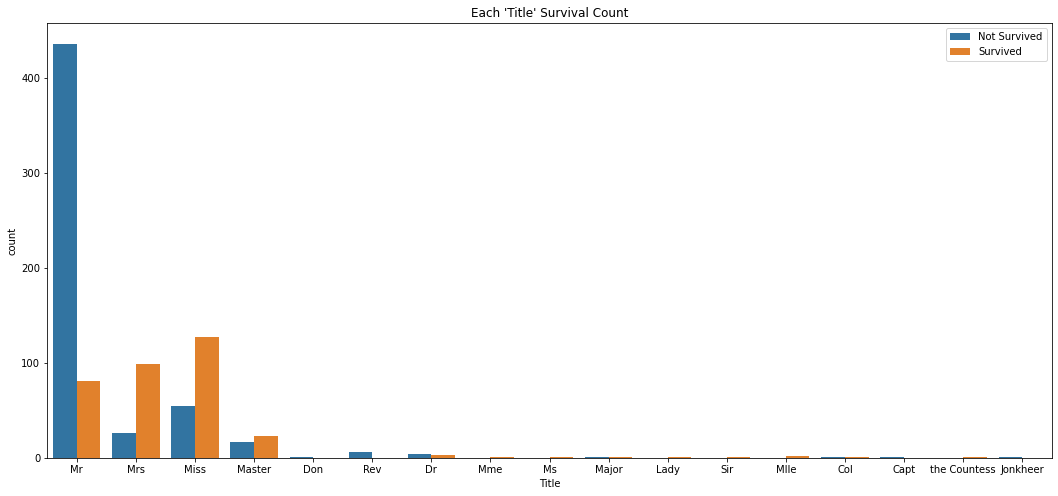

In [66]:
#GRAPH for 'Title'
plt.figure(figsize=(18, 8))
sns.countplot(x='Title', hue='Survived', data=train_data)
plt.legend(['Not Survived','Survived'],loc='upper right')
plt.title("Each 'Title' Survival Count")

SUMMARY: The top number of title for passengers is 'Mr' and the top number of family name is Andersson. But 'Mrs' and 'Miss' have higher number of survived then 'Mr'.

### `Cabin`

`'Cabin'` is the cabin number of each passenger.

MISSING DATA: There is 77% missing data.

In [76]:
cabin_missing = train_data.Cabin.isna().sum()
print("Missing data in 'Name' column:", cabin_missing)

percent_cabin_missing = ((cabin_missing/(train_data.shape[0]))*100).round(2)
print("Percent missing in 'Name' column:", percent_cabin_missing)

Missing data in 'Name' column: 687
Percent missing in 'Name' column: 77.1
